# Desafio Entregável 
## Visualizações em Python
1. Carregar este arquivo em Python. Executar estatísticas descritivas básicas no Python.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [75]:
df = pd.read_csv("Bases/HRDataset_v14.csv", encoding='utf-8-sig')
df.head(3)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3


In [76]:
df.index = df['EmpID']
df = df.drop('EmpID', axis='columns')
df.head(3)

,Employee_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
EmpID,,,,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,0,1,1,5,4,0,62506,0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
10084,"Ait Sidi, Karthikeyan",1,1,1,5,3,3,0,104437,1,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
10196,"Akinkuolie, Sarah",1,1,0,5,5,3,0,64955,1,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 10026 to 10271
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   MarriedID                   311 non-null    int64  
 2   MaritalStatusID             311 non-null    int64  
 3   GenderID                    311 non-null    int64  
 4   EmpStatusID                 311 non-null    int64  
 5   DeptID                      311 non-null    int64  
 6   PerfScoreID                 311 non-null    int64  
 7   FromDiversityJobFairID      311 non-null    int64  
 8   Salary                      311 non-null    int64  
 9   Termd                       311 non-null    int64  
 10  PositionID                  311 non-null    int64  
 11  Position                    311 non-null    object 
 12  State                       311 non-null    object 
 13  Zip                         3

In [10]:
# Mediana dos Salários
df['Salary'].median()

62810.0

In [17]:
# Contagem de Homens e Mulheres
df['GenderID'].value_counts()

0    176
1    135
Name: GenderID, dtype: int64

In [21]:
# Média de Faltas
round(df['Absences'].mean())

10

In [46]:
df['Salary'].min()

45046

2. Fazer um histograma com salários. Quais faixas salariais são as mais populares?

In [28]:
len(df['Salary'].values.flatten())

311

Text(0.5, 0, 'Salários')

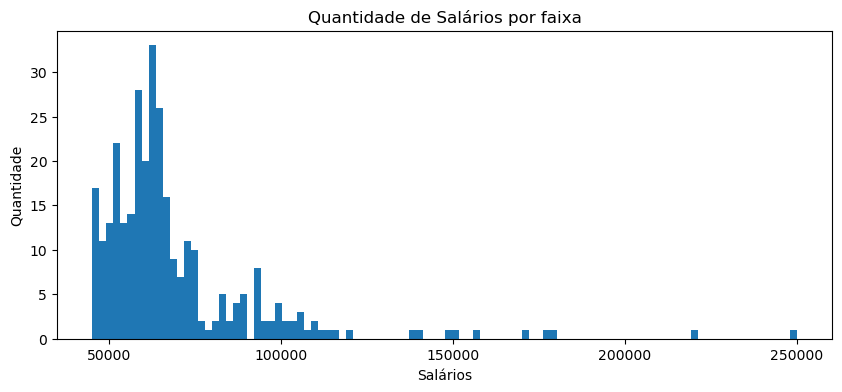

In [49]:
fig, ax = plt.subplots(figsize = (10,4), sharey=False)
ax.hist(df['Salary'].values.flatten(), bins=100)

ax.set_title('Quantidade de Salários por faixa')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Salários')

In [53]:
# Não consegui incluir mais divisões no eixo x para melhorar a visualização da faixa, mas pelo mediana, conseguimos entender 
# que a faixa mais popular de salário está entre 60 mil a 65 mil.
df['Salary'].median()

62810.0

C:\Users\Camila Gongora\AppData\Local\Temp\ipykernel_10248\3534942975.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( a=df["Salary"], hist=True, kde=True, rug=False )


<AxesSubplot:xlabel='Salary', ylabel='Density'>

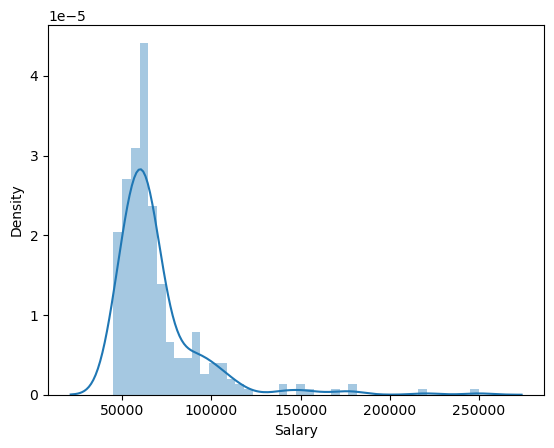

In [60]:
sns.distplot( a=df["Salary"], hist=True, kde=True, rug=False )

3. Fazer um gráfico de violino com salários, discriminados por gênero.

<AxesSubplot:xlabel='GenderID', ylabel='Salary'>

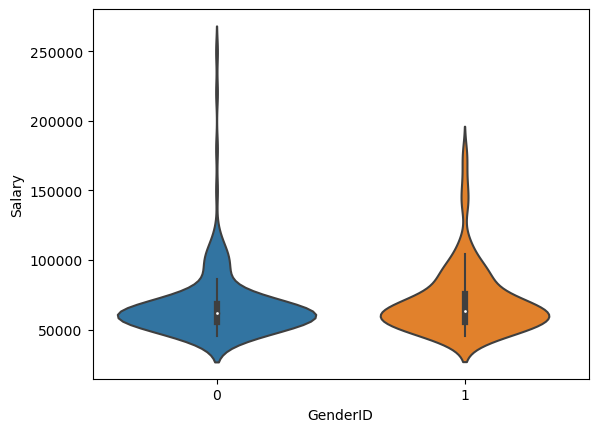

In [52]:
sns.violinplot(x=df['GenderID'], y=df['Salary'])

In [ ]:
#Triste realidade das mulher com salários menores do que os homens :(

4. Traçar a série temporal correspondente à data de contratação (DateofHire)

In [92]:
df = pd.read_csv("Bases/HRDataset_v14.csv", encoding='utf-8-sig')
df.head(3)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3


In [98]:
df.index = df['DateofHire']
df = df.drop('DateofHire', axis='columns')
df.head(3)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Dia_contratacao,Mes_contratacao,Ano_contratacao
DateofHire,,,,,,,,,,,,,,,,,,,,,
7/5/2011,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Exceeds,4.60,5,0,1/17/2019,0,1,7,5,2011
3/30/2015,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Fully Meets,4.96,3,6,2/24/2016,0,17,3,30,2015
7/5/2011,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Fully Meets,3.02,3,0,5/15/2012,0,3,7,5,2011


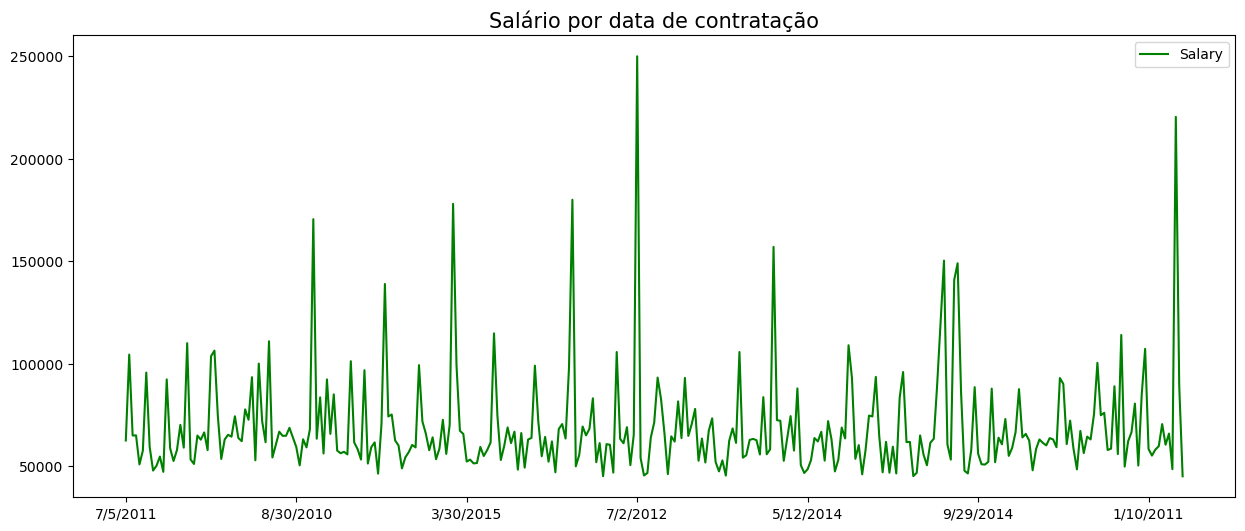

In [101]:
plt.figure(figsize=(15,6))
df['Salary'].plot(color='g')
plt.xlabel('')
plt.title('Salário por data de contratação',size=15)
plt.legend()
plt.show()